In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_raw = pd.read_csv('../raw_data/csv/eqls_2007and2011.csv')
df_processed = pd.read_csv("../data/eqls_processed.csv")

<Axes: xlabel='Y11_EmploymentStatus'>

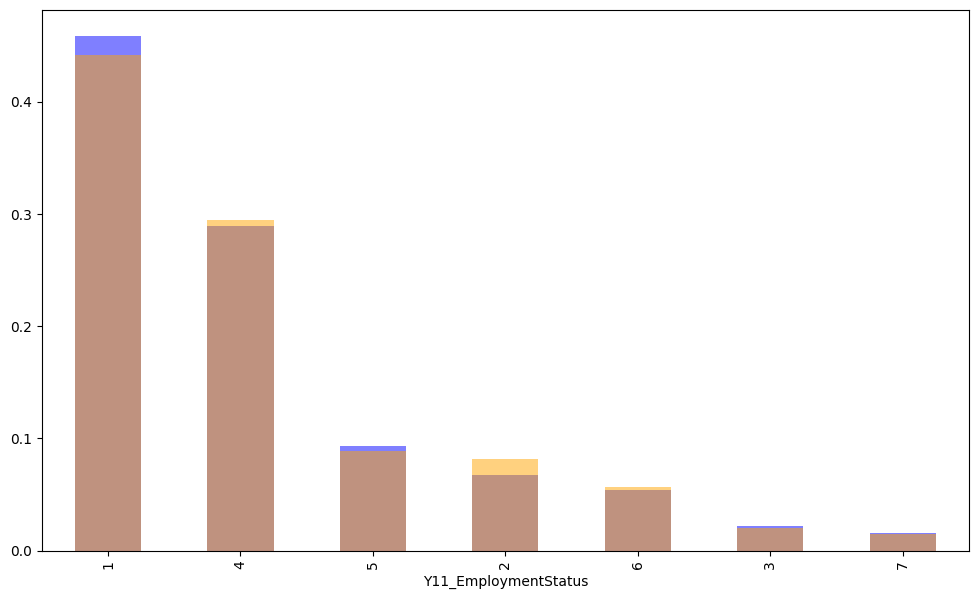

In [ ]:
# Check the employment status bug
fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
df_raw['Y11_EmploymentStatus'].value_counts(normalize=True).plot(kind='bar', ax=ax, color='blue', alpha=0.5)
df_processed['Y11_EmploymentStatus'].value_counts(normalize=True).plot(kind='bar', ax=ax, color='orange', alpha=0.5)
